In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2026-01-07 10:00:19.639720: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-07 10:00:19.639900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 10:00:19.670336: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-07 10:00:20.468956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
#data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#piksel değerlerini normalize ediyoruz (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

#CNN için giriş verisi 4 boyutlu olmalı: sayısı, yükseklik, genişlik, kanal
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Eğitim verisi:", X_train.shape, y_train.shape)
print("Test verisi:", X_test.shape, y_test.shape)

Eğitim verisi: (60000, 28, 28, 1) (60000,)
Test verisi: (10000, 28, 28, 1) (10000,)


In [3]:
#evrişimsel CNN modeli oluşturma
model = tf.keras.models.Sequential([
    # 1. Evrişim katmanı: 32 filtre 3x3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    
    #boyut küçültme
    tf.keras.layers.MaxPooling2D((2,2)),

    # 2. Evrişim katmanı: 64 filtre
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    #boyut küçültme
    tf.keras.layers.MaxPooling2D((2,2)),

    #Özellik haritalarını vektöre çevirme
    tf.keras.layers.Flatten(),

    #tam bağlantılı katman
    tf.keras.layers.Dense(128, activation='relu'),

    #dropout
    tf.keras.layers.Dropout(0.3),

    #Çıkış katmanı
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/home/toros/sinir_aglari_final/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-07 10:00:23.245173: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#aşırı öğrenmeyi önlemek için EarlyStopping kullanımı
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

#modelin eğitilmesi
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8030 - loss: 0.5436 - val_accuracy: 0.8575 - val_loss: 0.3864
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8725 - loss: 0.3493 - val_accuracy: 0.8766 - val_loss: 0.3326
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8906 - loss: 0.3004 - val_accuracy: 0.8831 - val_loss: 0.3041
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8998 - loss: 0.2701 - val_accuracy: 0.9025 - val_loss: 0.2658
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9075 - loss: 0.2476 - val_accuracy: 0.9012 - val_loss: 0.2625
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9145 - loss: 0.2297 - val_accuracy: 0.8997 - val_loss: 0.2661
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9213 - loss: 0.2123 - val_accuracy: 0.9108 - val_loss: 0.2435
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9263 - loss: 0.1975 - val_accuracy: 0.

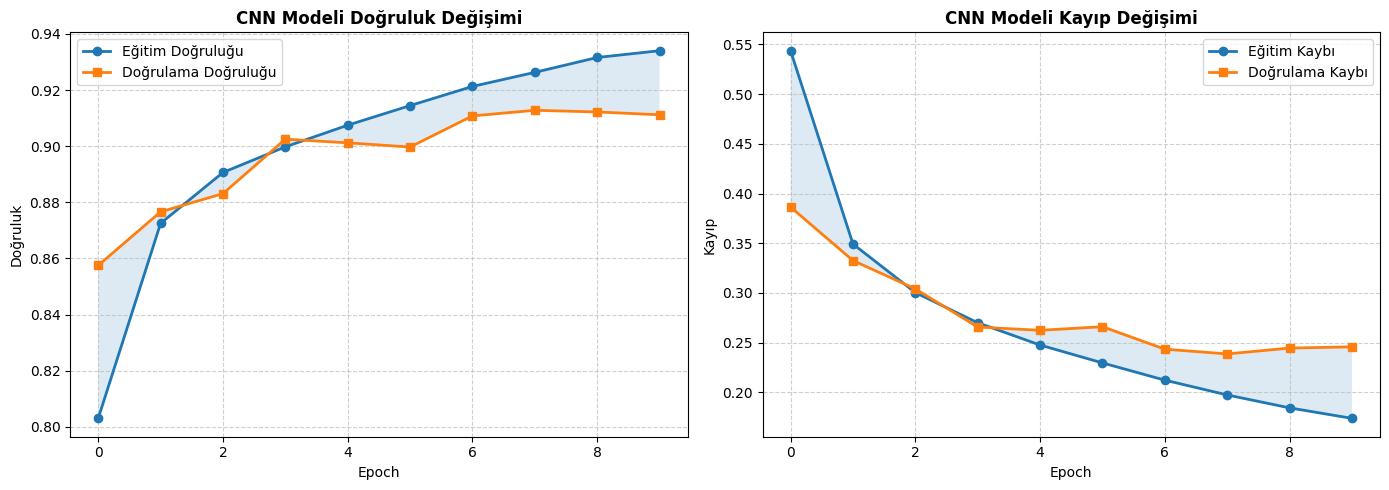

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Accuracy
axes[0].plot(history.history['accuracy'], marker='o', linewidth=2, label='Eğitim Doğruluğu')
axes[0].plot(history.history['val_accuracy'], marker='s', linewidth=2, label='Doğrulama Doğruluğu')
axes[0].fill_between(
    range(len(history.history['accuracy'])),
    history.history['accuracy'],
    history.history['val_accuracy'],
    alpha=0.15
)
axes[0].set_title('CNN Modeli Doğruluk Değişimi', fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Doğruluk')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Loss
axes[1].plot(history.history['loss'], marker='o', linewidth=2, label='Eğitim Kaybı')
axes[1].plot(history.history['val_loss'], marker='s', linewidth=2, label='Doğrulama Kaybı')
axes[1].fill_between(
    range(len(history.history['loss'])),
    history.history['loss'],
    history.history['val_loss'],
    alpha=0.15
)
axes[1].set_title('CNN Modeli Kayıp Değişimi', fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Kayıp')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Kayıp (Loss): {test_loss:.4f}")
print(f"Test Doğruluğu (Accuracy): {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9128 - loss: 0.2387
Test Kayıp (Loss): 0.2387
Test Doğruluğu (Accuracy): 91.28%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


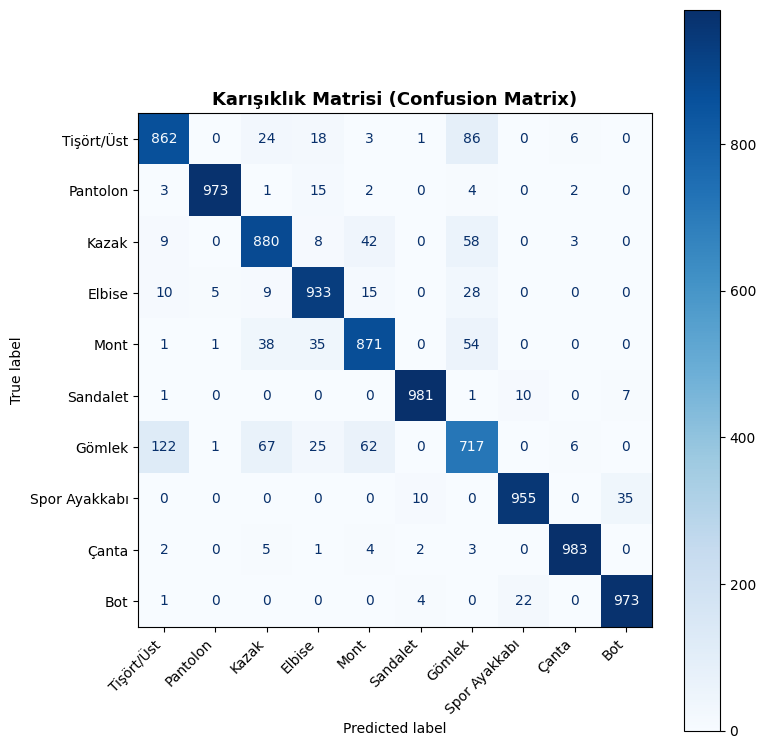

In [8]:
#model tahminleri
y_pred = np.argmax(model.predict(X_test), axis=1)

#Fashion-MNIST sınıf isimleri
class_names = [
    "Tişört/Üst", "Pantolon", "Kazak", "Elbise", "Mont",
    "Sandalet", "Gömlek", "Spor Ayakkabı", "Çanta", "Bot"
]

#Confusion Matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

#görselleştirme
fig, ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.title("Karışıklık Matrisi (Confusion Matrix)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()